In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
train_datagen = ImageDataGenerator(
    rescale= 1
)
test_datagen = ImageDataGenerator(
    rescale= 1
)

In [3]:
model = keras.Sequential()

In [4]:
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())


model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(5, activation='softmax'))





In [5]:
train_itreator = train_datagen.flow_from_directory('flowers/train',batch_size =64,target_size=(100,100))
test_itreator = test_datagen.flow_from_directory('flowers/test',batch_size =64,target_size=(100,100))

Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(test_itreator,validation_data=train_itreator,epochs=12)
print(model.summary())

Epoch 1/12
19/19 [==============================] - 66s 3s/step - loss: 260.8217 - accuracy: 0.2708 - val_loss: 2.1202 - val_accuracy: 0.2958
Epoch 2/12
19/19 [==============================] - 60s 3s/step - loss: 2.5186 - accuracy: 0.4242 - val_loss: 1.4757 - val_accuracy: 0.4042
Epoch 3/12
19/19 [==============================] - 59s 3s/step - loss: 1.1341 - accuracy: 0.5883 - val_loss: 1.5066 - val_accuracy: 0.4228
Epoch 4/12
19/19 [==============================] - 57s 3s/step - loss: 11.7054 - accuracy: 0.4375 - val_loss: 1.7848 - val_accuracy: 0.3080
Epoch 5/12
19/19 [==============================] - 58s 3s/step - loss: 1.1550 - accuracy: 0.5475 - val_loss: 1.7064 - val_accuracy: 0.3577
Epoch 6/12
19/19 [==============================] - 63s 3s/step - loss: 13.0354 - accuracy: 0.4750 - val_loss: 22.9432 - val_accuracy: 0.1768
Epoch 7/12
19/19 [==============================] - 81s 4s/step - loss: 4.8322 - accuracy: 0.5417 - val_loss: 1.7275 - val_accuracy: 0.3840
Epoch 8/12
19/1

Found 4317 images belonging to 2 classes.


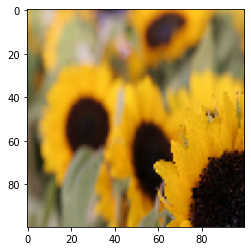

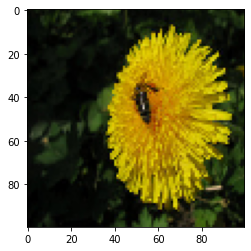

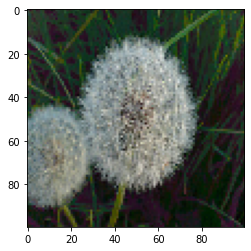

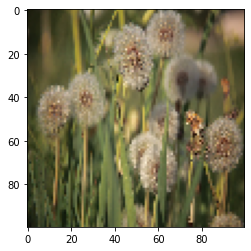

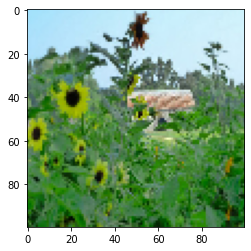

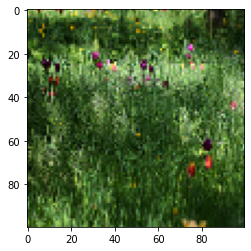

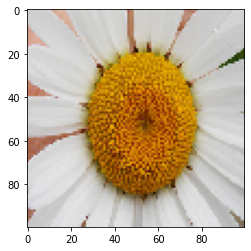

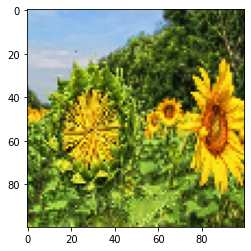

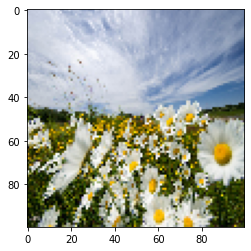

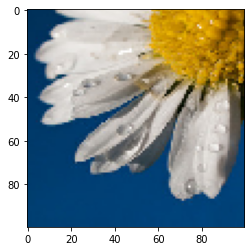

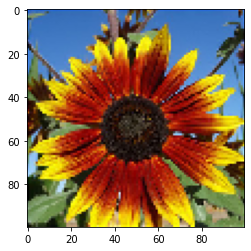

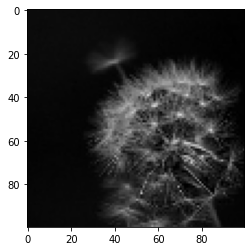

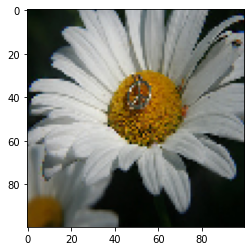

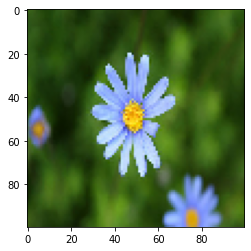

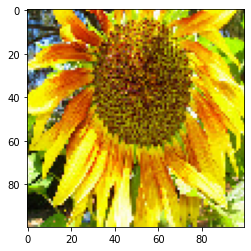

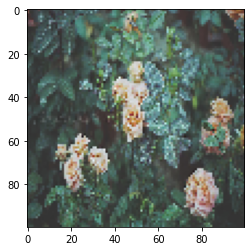

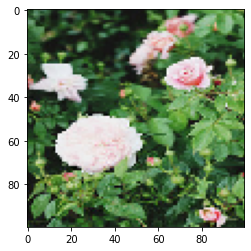

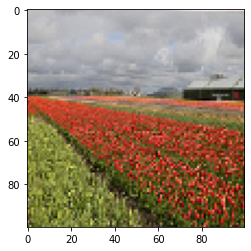

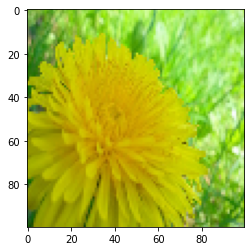

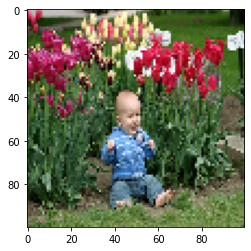

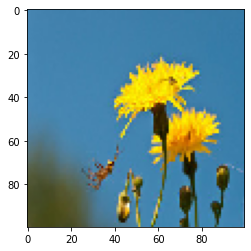

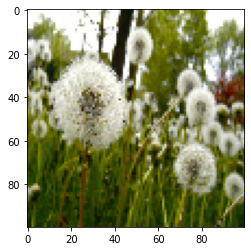

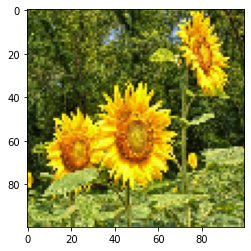

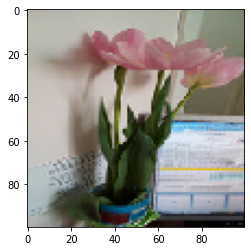

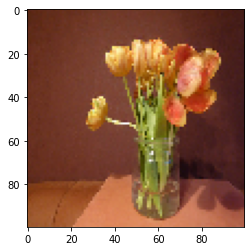

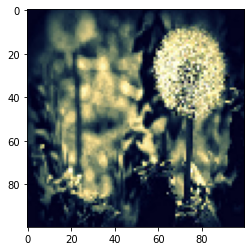

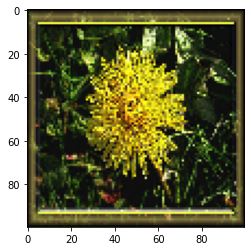

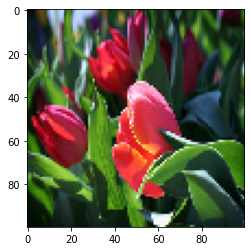

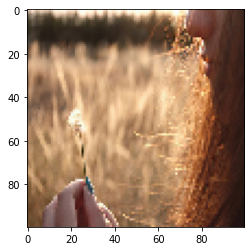

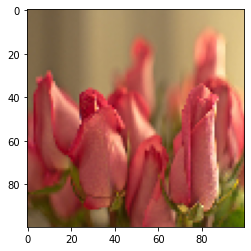

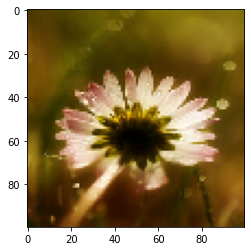

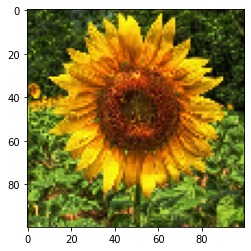

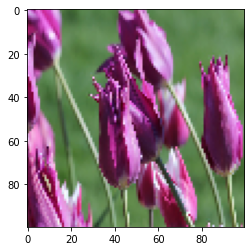

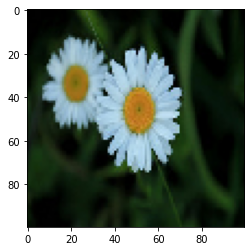

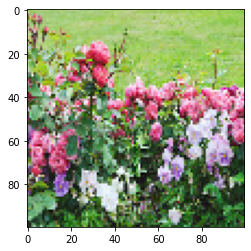

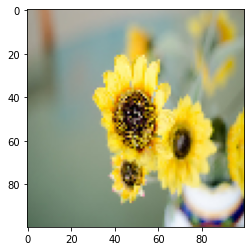

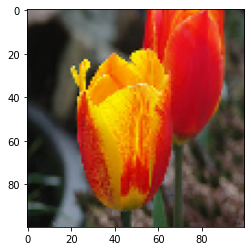

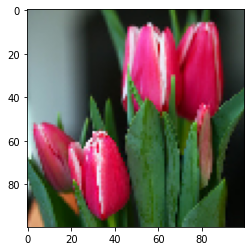

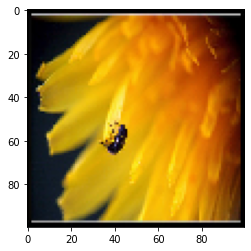

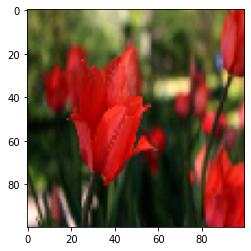

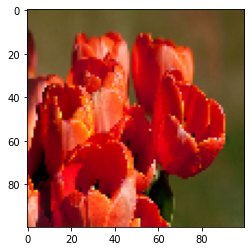

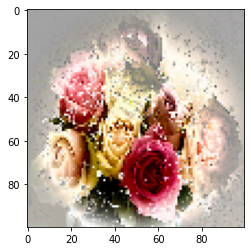

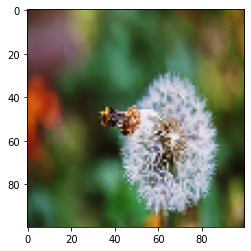

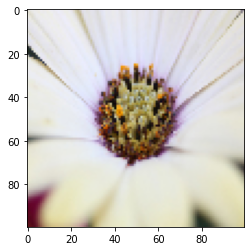

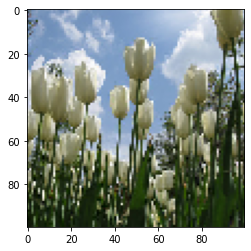

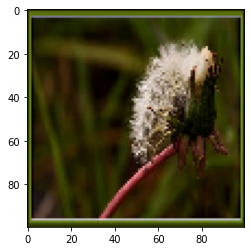

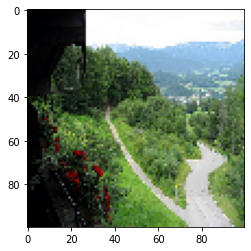

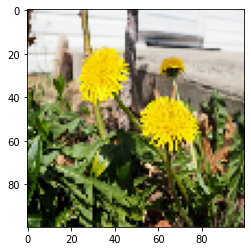

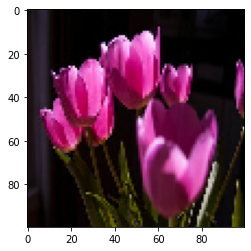

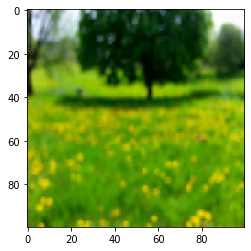

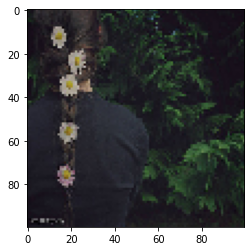

In [7]:
i = 0

for batch in test_datagen.flow_from_directory('flowers',target_size=(100,100),
                                                  batch_size = 1):
    images = batch[0].astype('uint8')
    image = np.squeeze(images)
    i = i+1
    plt.imshow(image)
    plt.show()
    
    if i > 50 :
         break
    

    

<AxesSubplot:ylabel='Count'>

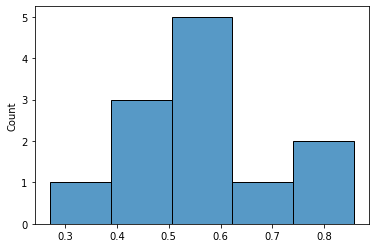

In [8]:
sns.histplot(history.history['accuracy'])

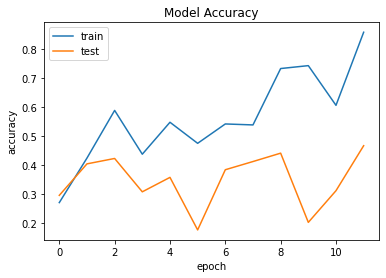

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

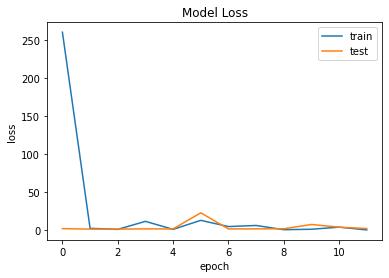

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()